# test demo

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import tensorflow as tf

/home/zjk/data/anaconda3/envs/tf_1.11.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zjk/data/anaconda3/envs/tf_1.11.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zjk/data/anaconda3/envs/tf_1.11.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zjk/data/anaconda3/envs/t

In [3]:
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation='softmax')
            ])

In [7]:
model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                                    metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.2975 - acc: 0.9126
Epoch 2/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.1442 - acc: 0.9569
Epoch 3/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.1061 - acc: 0.9688
Epoch 4/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.0880 - acc: 0.9732
Epoch 5/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.0738 - acc: 0.9768


In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 78us/step


[0.06949755695387722, 0.9793]

# Keras可视化

In [10]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 16s 362us/step - loss: 0.0788 - acc: 0.9754 - val_loss: 0.0590 - val_acc: 0.9801
Epoch 2/50
45000/45000 [==============================] - 16s 359us/step - loss: 0.0650 - acc: 0.9795 - val_loss: 0.0574 - val_acc: 0.9815
Epoch 3/50
45000/45000 [==============================] - 16s 361us/step - loss: 0.0581 - acc: 0.9804 - val_loss: 0.0580 - val_acc: 0.9807
Epoch 4/50
45000/45000 [==============================] - 16s 361us/step - loss: 0.0541 - acc: 0.9827 - val_loss: 0.0597 - val_acc: 0.9818
Epoch 5/50
45000/45000 [==============================] - 13s 282us/step - loss: 0.0458 - acc: 0.9851 - val_loss: 0.0683 - val_acc: 0.9807
Epoch 6/50
45000/45000 [==============================] - 16s 351us/step - loss: 0.0430 - acc: 0.9856 - val_loss: 0.0640 - val_acc: 0.9814
Epoch 7/50
45000/45000 [==============================] - 16s 362us/step - loss: 0.0418 - acc: 0.9867 - val_loss: 0.

## 绘制训练 & 验证的准确率值

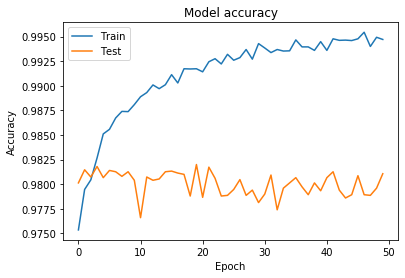

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 绘制训练 & 验证的损失值

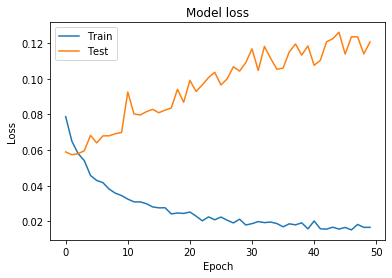

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()